In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import os
print(os.listdir("../input/digit-recognizer"))

['sample_submission.csv', 'train.csv', 'test.csv']


# Basics of Pytorch

- In pytorch, matrix(array) is called **tensors**
    - 3x3 matrix -> 3x3 tensor
- Tensors are similar to numpy arrays, except that tensors can **run on GPUs or other hardware accelerators**
- Tensors are **optimized for automatic differentiation** (자동 미분)
    - `Autograd`
- Tensors on the CPU and NumPy arrays can share their underlying memory locations (메모리 공간 공유), and changing one will change the other.

In [2]:
# numpy array

array = [[1,2,3],[4,5,6]]
first_array = np.array(array) # 2x3 array
print(type(first_array))
print(first_array.shape) # np.shape(first_array)
print(first_array)

<class 'numpy.ndarray'>
(2, 3)
[[1 2 3]
 [4 5 6]]


- Let's implement tensor
- Create tensor with `torch.tensor()` method
   - **Updated**
   - `torch.Tensor()`: Float Tensor
   - `torch.tensor()`: dtype is automatically inferred

In [3]:
# tensor (pytorch array)

import torch # import pytorch library

tensor = torch.tensor(array) 
print(tensor.type) # tensor type
print(tensor.shape) # tensor shape(size)
print(tensor)

<built-in method type of Tensor object at 0x7cd5f347cc20>
torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])


- Compare numpy and tensor

In [4]:
# 2x3 ones array
# np.ones() = torch.ones()

print(np.ones((2,3)))
print(torch.ones((2,3)))


# 2x3 random float(0~1) array
# np.random.rand() = torch.rand()

print(np.random.rand(2,3))
print(torch.rand(2,3))

[[1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.]])
[[0.51636543 0.81742051 0.91554721]
 [0.31176309 0.77456516 0.89040577]]
tensor([[0.2822, 0.8046, 0.1188],
        [0.1753, 0.3864, 0.2488]])


- Conversion between tensor and numpy array
    - numpy array -> tensor: `torch.from_numpy(np_array)`
    - tensor -> numpy array: `tensor.numpy()`

In [5]:
array = np.random.rand(2,2)  # 2x2 random float array

# numpy -> tensor: torch.from_numpy()
tensor = torch.from_numpy(array)
print(type(tensor),tensor)

# tensor -> numpy: numpy()
np_arr = tensor.numpy()
print(type(np_arr), np_arr)

<class 'torch.Tensor'> tensor([[0.8951, 0.9455],
        [0.7093, 0.0613]], dtype=torch.float64)
<class 'numpy.ndarray'> [[0.89511598 0.94550792]
 [0.70934581 0.0612929 ]]


> Tensor는 일반적으로 소수점 4자리까지 출력

### Basic Math with Pytorch

- tensor a, b
- resize: `view()`
- addition: `torch.add(a,b)` = a + b
- substraction: `a.sub(b)` = a - b
- element-wise multiplication: `torch.mul(a,b)` = a * b
- element-wise division: `torch.div(a,b)` = a / b
- sum: `a.sum()`
- mean: `a.mean()`
- std: `a.std()`

In [6]:
tensor = torch.ones(3,3) # 3x3 ones tensor
print(tensor)

# resize
tensor_view = tensor.view(9)
print(tensor_view.shape, tensor_view)

# addition
print(torch.add(tensor, tensor))

# sub
print(tensor.sub(tensor))

# element-wise multiplication
print(torch.mul(tensor, tensor))

# element-wise division
print(torch.div(tensor, tensor))

# sum
print(tensor.sum())

# mean
tensor = torch.tensor([1.,2.,3.,4.,5.])
print(tensor.mean())

# std
print(tensor.std())

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9]) tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor(9.)
tensor(3.)
tensor(1.5811)


### Variables

- **Updated**
    - [Pytorch docs](https://pytorch.org/docs/stable/autograd.html#variable-deprecated): "**Variable API has been deprecated. Autograd automatically supports Tensors with `requires_grad=True`.**" 

In [7]:
from torch.autograd import Variable 
# autograd: 자동 미분 패키지

# define variable (old version) 
var = Variable(torch.ones(3), requires_grad = True) # requires_grad=True: 미분 진행

# now return Tensor
print(var, type(var))

tensor([1., 1., 1.], requires_grad=True) <class 'torch.Tensor'>


- basic backward propagation

In [8]:
# backward propagation
# equation y = x^2

array = [2,4]

# parameter tensor
# need float type
x = torch.tensor(array, dtype=torch.float32, requires_grad = True) 

y = x**2
print("y = ", y)

# loss function
o = (1/2)*sum(y)
print("o = ", o)

# caculates gradients
o.backward()

# x has gradients
# derivatives of o with respect to x
# = x
print("gradients: ", x.grad)

y =  tensor([ 4., 16.], grad_fn=<PowBackward0>)
o =  tensor(10., grad_fn=<MulBackward0>)
gradients:  tensor([2., 4.])


# Linear Regression

- car company example
    - If the car price is low, we sell more car.
    - If the car price is high, we sell less car. 
    - What will be number of car sell if the car price is 10?

tensor([[3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]], requires_grad=True)
tensor([[7.5000],
        [7.0000],
        [6.5000],
        [6.0000],
        [5.5000],
        [5.0000],
        [4.5000]], requires_grad=True)


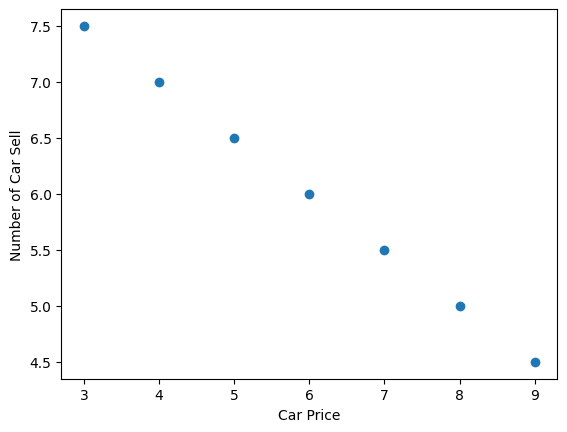

In [9]:
# data from previous selling
# car prices
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array, dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = torch.from_numpy(car_price_np).requires_grad_()
print(car_price_tensor)

# number of car sell
number_of_car_sell_array = [7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array, dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = torch.from_numpy(number_of_car_sell_np).requires_grad_()
print(number_of_car_sell_tensor)

# visualize data
plt.scatter(car_prices_array, number_of_car_sell_array)
plt.xlabel("Car Price")
plt.ylabel("Number of Car Sell")
plt.show()

### Steps of Linear Regression
1. Create LinearRegression class
2. Define model from the LinearRegression class
3. Loss function: MSE(Mean Squared Error)
4. Optimization Algorirthm: SGD(Stochastic Gradient Descent, 확률적 경사 하강법)
5. Train model
6. Prediction

epoch 0, loss 118.32721710205078
epoch 50, loss 4.835902690887451
epoch 100, loss 3.267822265625
epoch 150, loss 2.2082037925720215
epoch 200, loss 1.4921751022338867
epoch 250, loss 1.008325457572937
epoch 300, loss 0.681367039680481
epoch 350, loss 0.46042779088020325
epoch 400, loss 0.31113043427467346
epoch 450, loss 0.21024373173713684
epoch 500, loss 0.14207027852535248
epoch 550, loss 0.09600288420915604
epoch 600, loss 0.06487329304218292
epoch 650, loss 0.043837450444698334
epoch 700, loss 0.029622463509440422
epoch 750, loss 0.020017070695757866
epoch 800, loss 0.013526487164199352
epoch 850, loss 0.00914025492966175
epoch 900, loss 0.006176461465656757
epoch 950, loss 0.0041736732237041
epoch 1000, loss 0.0028202824760228395


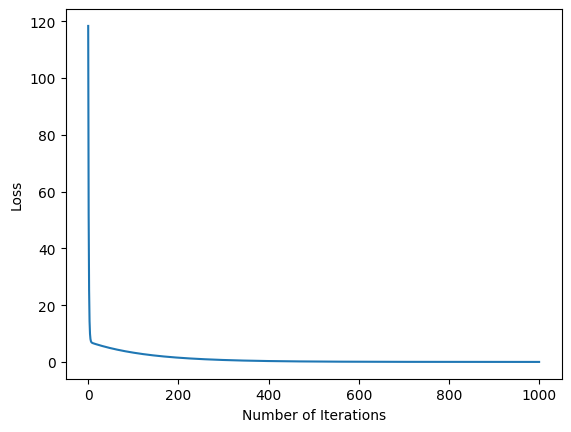

In [10]:
# Linear Regression with Pytorch

import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")

# LinearRegression class
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        
        # Linear function
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        # linear transformation
        return self.linear(x)
    
# Instantiate Model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

# Loss funciton: MSE
mse = nn.MSELoss()

# SGD Optimization 
# find parameters that minimize error
learning_rate = 0.02 
optimizer= torch.optim.SGD(model.parameters(), lr = learning_rate)

# Train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
    # initialize graidents
    optimizer.zero_grad()
    
    # forward
    results = model(car_price_tensor)
    
    # caculate loss
    loss = mse(results, number_of_car_sell_tensor)
    
    # backward propagation
    loss.backward()
    
    # update parameters with gradients
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))
    

# visualization loss 
plt.plot(range(iteration_number), loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

> Loss is almost zero in epoch number 1000

> Now we have trained model

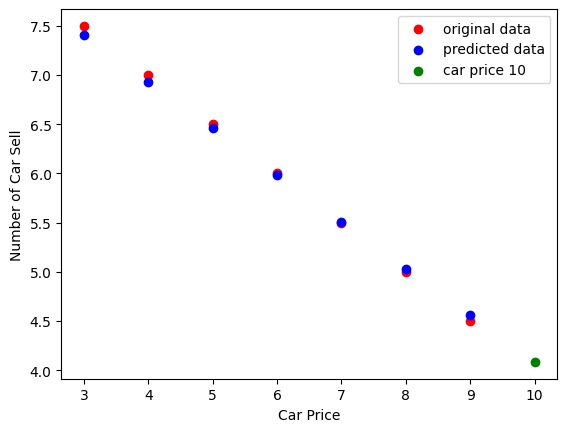

In [11]:
# Prediction
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array, number_of_car_sell_array, label="original data", color="red")
plt.scatter(car_prices_array, predicted, label="predicted data", color="blue")

# predict if car price is 10, what will be the number of car sell
predicted_10 = model(torch.from_numpy(np.array([10], dtype=np.float32))).data.numpy()
plt.scatter(10, predicted_10, label="car price 10", color="green")

plt.legend()
plt.xlabel("Car Price")
plt.ylabel("Number of Car Sell")
plt.show()

# Logistic Regression
- Logistic regression for classification

### Prepare Dataset
- MNIST dataset
- 28x28 images 
- 10 labels from 0 to 9
- unnormalized data
    - We divide each image to 255 that is basic normalization for images.
- data split: `train_test_split()` method from sklearn library
    - total: 42000
    - train data 80% : test data 20%.
- create feature and target tensors
- `TensorDataset()`: `Dataset` wrapping tensors
    - `Dataset` stores samples and their corresponding labels
    - Each sample is retrieved by indexing tensors along the first dimension
- `DataLoader()`: It wraps an iterable around the Dataset

In [12]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split

In [13]:
# load data
train = pd.read_csv("../input/digit-recognizer/train.csv", dtype = np.float32)

In [14]:
# split data into features(pixels) and labels(0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:, train.columns != "label"].values

# normalization
features_numpy /= 255

# train test split
# 80:20
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy, targets_numpy, test_size=0.2, random_state=42) 

# create feature, targets tensor
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # long type
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # long type

print(featuresTrain.shape, targetsTrain.shape, featuresTest.shape, targetsTest.shape)

torch.Size([33600, 784]) torch.Size([33600]) torch.Size([8400, 784]) torch.Size([8400])


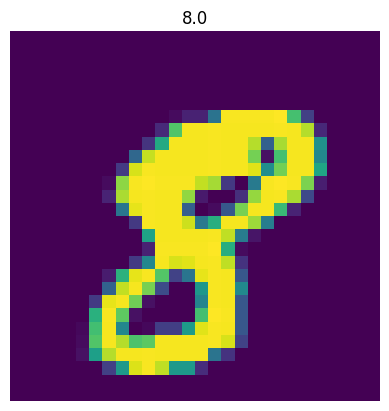

In [15]:
# visualize one sample
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.show()

In [16]:
# batch_size
batch_size = 100

# iterations
n_iters = 10000

# epoch
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

print((len(features_train) / batch_size)) # number of batches
print(num_epochs)

336.0
29


In [17]:
# TorchDataset()
# train feature tensor - train target tensor
train = TensorDataset(featuresTrain, targetsTrain)
# test feature tensor - test target tensor
test = TensorDataset(featuresTest, targetsTest)

# DataLoader()
train_loader = DataLoader(train, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False)

### Steps of Logistic Regression
  1. Create Logistic Regression class
  2. Instantiate Model from the Logistic Regression class
    - input_dim = 28x28 (size of image)
    - output_dim = 10 (labels 0 to 9)
  3. Loss function: Cross entropy loss
    - softmax function
  4. Optimization Algorirthm: SGD
  5. Traning model
  6. Prediction

In [18]:
# Logistic Regression with Pytorch

# Logistic Regression Class
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        # Linear transformation
        out = self.linear(x)
        return out

# Instantiate Model 
input_dim = 28*28 # features
output_dim = 10 # labels
model = LogisticRegressionModel(input_dim, output_dim)

# Loss funciton: Cross Entropy Loss  
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [19]:
# Train model
count = 0
loss_list = []
iteration_list = []

for epoch in range(num_epochs):
    # i: minibatch index
    # images: 현재 미니배치의 images tensor
    # labels: 해당 이미지들의 labels tensor
    for i, (images, labels) in enumerate(train_loader):
        train = images.view(-1, 28*28)
        train = torch.tensor(train, dtype=torch.float32, requires_grad=True)
        
        # initialize gradients
        optimizer.zero_grad()
        
        # forward
        outputs = model(train)
        
        # calculate loss
        loss = error(outputs, labels)
        
        # backward propagation
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        count += 1
        
        # Prediction & Accuracy
        if count % 50 == 0:
            # for calculating accuracy
            correct = 0
            total = 0
            
            for images, labels in test_loader: 
                test = images.view(-1, 28*28)
                test = torch.tensor(test, dtype=torch.float32, requires_grad=True)
                
                # forward
                outputs = model(test)
                
                # predict from the maximum value
                predicted = torch.max(outputs.data, 1)
                
                # total numbers of labels
                total += len(labels)
                
                # total correct predictions
                # item(): single-element tensor -> python numerical value
                correct += torch.eq(predicted.indices, labels).sum().item()
            
            accuracy = int(100 * correct / float(total))
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            
        if count % 500 == 0:
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.852205514907837  Accuracy: 66%
Iteration: 1000  Loss: 1.6298511028289795  Accuracy: 74%
Iteration: 1500  Loss: 1.3180534839630127  Accuracy: 78%
Iteration: 2000  Loss: 1.2106335163116455  Accuracy: 79%
Iteration: 2500  Loss: 1.0579975843429565  Accuracy: 80%
Iteration: 3000  Loss: 0.9523541927337646  Accuracy: 81%
Iteration: 3500  Loss: 0.9003661274909973  Accuracy: 82%
Iteration: 4000  Loss: 0.7589147686958313  Accuracy: 83%
Iteration: 4500  Loss: 0.9784387350082397  Accuracy: 83%
Iteration: 5000  Loss: 0.7976140379905701  Accuracy: 84%
Iteration: 5500  Loss: 0.7539225816726685  Accuracy: 84%
Iteration: 6000  Loss: 0.8873045444488525  Accuracy: 84%
Iteration: 6500  Loss: 0.668407678604126  Accuracy: 84%
Iteration: 7000  Loss: 0.7115857601165771  Accuracy: 84%
Iteration: 7500  Loss: 0.6412349939346313  Accuracy: 85%
Iteration: 8000  Loss: 0.7455040216445923  Accuracy: 85%
Iteration: 8500  Loss: 0.5437196493148804  Accuracy: 85%
Iteration: 9000  Loss: 0.665160000

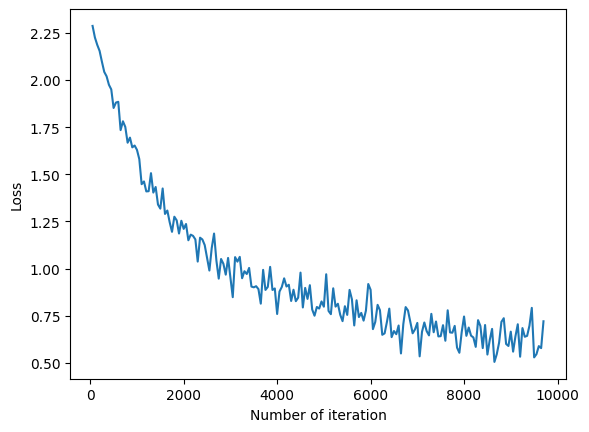

In [20]:
# visualization
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.show()

> Accuracy is 85% and Loss is 0.53

# ANN

- Artificial Neural Network
- Add more **non-linear functions** as **hidden layer**
- complexity of model increases 
- accuracy increases

### Prepare Dataset
- same with previous part
    - use `train_loader`, `test_loader`

### Steps of ANN
  1. Create ANN Model class
    - 3 hidden layers
    - activiation functions: ReLU, tanh, ELU 
  2. Instantiate Model from ANN class
    - input_dim = 28x28 (size of image)
    - output_dim = 10 (labels 0 to 9)
    - hidden_dim = 150
        - hidden layer dimension is hyperparameter (150 in the example)
  3. Loss function: Cross entropy loss
    - softmax function
  4. Optimization Algorirthm: SGD
  5. Traning model
  6. Prediction

In [24]:
# ANN with Pytorch

# ANN Model Class
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # Linear function 1
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        
        # Non-linear function 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        
        # Non-linear function 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        
        # Non-linear function 3
        self.elu3 = nn.ELU()
        
        # Linear function 4
        self.fc4 = nn.Linear(hidden_dim, output_dim)
    
    # forward
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.tanh2(out)
        out = self.fc3(out)
        out = self.elu3(out)
        out = self.fc4(out)
        return out
    

# Instantiate Model 
input_dim = 28*28 # features
hidden_dim = 150
output_dim = 10 # labels
model = ANNModel(input_dim, hidden_dim, output_dim)

# Loss funciton: Cross Entropy Loss  
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [25]:
# Train model
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(num_epochs):
    # i: minibatch index
    # images: 현재 미니배치의 images tensor
    # labels: 해당 이미지들의 labels tensor
    for i, (images, labels) in enumerate(train_loader):
        train = images.view(-1, 28*28)
        train = torch.tensor(train, dtype=torch.float32, requires_grad=True)
        
        # initialize gradients
        optimizer.zero_grad()
        
        # forward
        outputs = model(train)
        
        # calculate loss
        loss = error(outputs, labels)
        
        # backward propagation
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        count += 1
        
        # Prediction & Accuracy
        if count % 50 == 0:
            # for calculating accuracy
            correct = 0
            total = 0
            
            for images, labels in test_loader: 
                test = images.view(-1, 28*28)
                test = torch.tensor(test, dtype=torch.float32, requires_grad=True)
                
                # forward
                outputs = model(test)
                
                # predict from the maximum value
                predicted = torch.max(outputs.data, 1)
                
                # total numbers of labels
                total += len(labels)
                
                # total correct predictions
                # item(): single-element tensor -> python numerical value
                correct += torch.eq(predicted.indices, labels).sum().item()
            
            accuracy = int(100 * correct / float(total))
            
            # store loss and iteration and accuracy
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            
        if count % 500 == 0:
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.7160317897796631  Accuracy: 80%
Iteration: 1000  Loss: 0.45377907156944275  Accuracy: 87%
Iteration: 1500  Loss: 0.22699487209320068  Accuracy: 89%
Iteration: 2000  Loss: 0.29590073227882385  Accuracy: 90%
Iteration: 2500  Loss: 0.3331882953643799  Accuracy: 92%
Iteration: 3000  Loss: 0.11721648275852203  Accuracy: 92%
Iteration: 3500  Loss: 0.246369406580925  Accuracy: 93%
Iteration: 4000  Loss: 0.06383875012397766  Accuracy: 94%
Iteration: 4500  Loss: 0.32033127546310425  Accuracy: 94%
Iteration: 5000  Loss: 0.1141560822725296  Accuracy: 94%
Iteration: 5500  Loss: 0.18280936777591705  Accuracy: 94%
Iteration: 6000  Loss: 0.19627639651298523  Accuracy: 95%
Iteration: 6500  Loss: 0.09970375895500183  Accuracy: 95%
Iteration: 7000  Loss: 0.11917373538017273  Accuracy: 95%
Iteration: 7500  Loss: 0.12156857550144196  Accuracy: 95%
Iteration: 8000  Loss: 0.16833673417568207  Accuracy: 95%
Iteration: 8500  Loss: 0.054998449981212616  Accuracy: 96%
Iteration: 9000  Lo

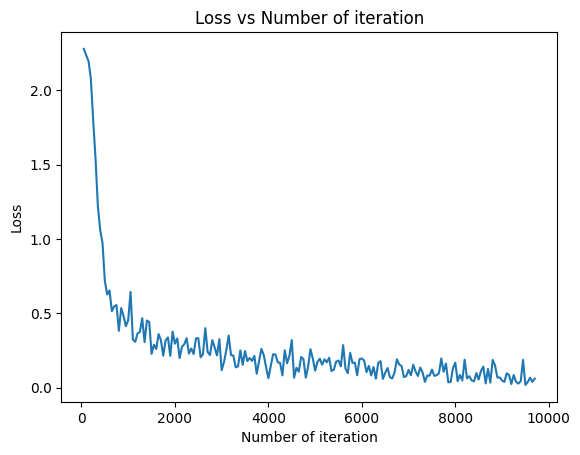

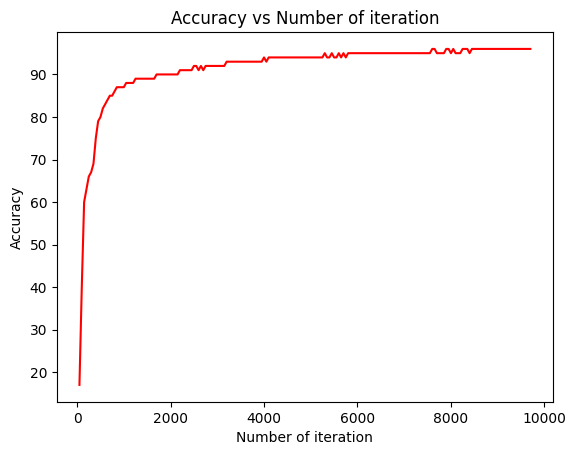

In [26]:
# visualization loss 
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list, accuracy_list, color="red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of iteration")
plt.show()

> Accuracy is 96% and Loss is 0.02 (better than Logistic Regression) 